In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

ModuleNotFoundError: No module named 'pandas'

In [3]:
import matplotlib.pyplot as plt

ImportError: DLL load failed while importing _cext: 지정된 모듈을 찾을 수 없습니다.

In [1]:
import matplotlib.pyplot as plt

ImportError: DLL load failed while importing _cext: 지정된 모듈을 찾을 수 없습니다.

In [1]:
import matplotlib.pyplot as plt

In [2]:
# import required libraries

import pandas as pd
import numpy as np

In [3]:
from sklearn import linear_model

In [7]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [8]:
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
data = df[["ENGINESIZE", "CO2EMISSIONS"]]
print(data)

      ENGINESIZE  CO2EMISSIONS
0            2.0           196
1            2.4           221
2            1.5           136
3            3.5           255
4            3.5           244
...          ...           ...
1062         3.0           271
1063         3.2           264
1064         3.0           271
1065         3.2           260
1066         3.2           294

[1067 rows x 2 columns]


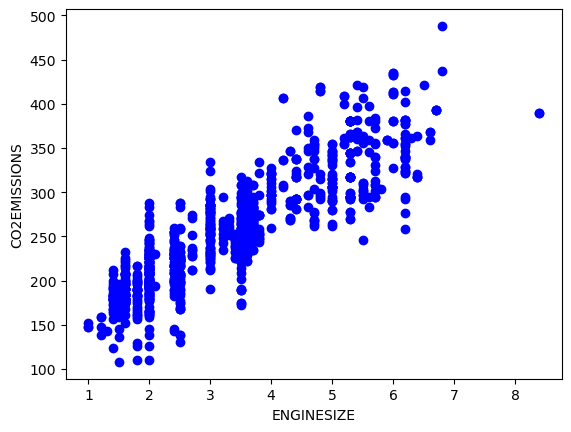

In [13]:
plt.scatter(data["ENGINESIZE"], data["CO2EMISSIONS"], color = 'blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [15]:
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

In [16]:
#Modeling

from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.array(train[["ENGINESIZE"]])
train_y = np.array(train[["CO2EMISSIONS"]])

regr.fit(train_x, train_y)

# the coefficients : 

print("coefficients :", regr.coef_) # 계수
print("Intercept :", regr.intercept_) # 절편

coefficients : [[38.79512384]]
Intercept : [127.16989951]


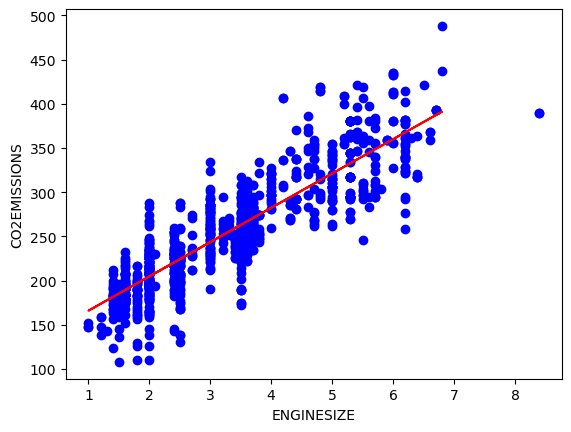

In [19]:
plt.scatter(data["ENGINESIZE"], data["CO2EMISSIONS"], color = 'blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r') #plt.plot(x,y,color)

In [20]:
# 값을 예측하는 회귀분석을 진행

def get_regression_predictions(input_features, intercept, slope):
    predicted_values = input_features*slope + intercept

    return predicted_values

In [22]:
my_engine_size = 3.5

estimate_emission = get_regression_predictions(my_engine_size, regr.intercept_[0], regr.coef_[0][0])
print(regr.intercept_[0])
print(regr.coef_[0][0])
print("Estimated Emission :", estimate_emission)

127.16989950881936
38.79512383605655
Estimated Emission : 262.9528329350173


In [28]:
from sklearn.metrics import r2_score

test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean abolute error: {:.3f}".format(np.mean(np.absolute(test_y_ - test_y))))
print("Mean sum of squares (MSE): {:.3f}".format(np.mean((test_y_ - test_y)**2)))
print("R2-score: {:.3f}".format(r2_score(test_y_, test_y)))

Mean abolute error: 20.602
Mean sum of squares (MSE): 746.454
R2-score: 0.710
